In [4]:
import networkx as nx
import pandas as pd
from scipy.stats import entropy
import math
import statistics
import numpy as np
import matplotlib.pyplot as plt
import copy
from collections import Counter

In [3]:
G = nx.read_gexf('../data_collection/data/GS.gexf')

In [6]:
counter_geo_nodes = {}
for u in G.nodes():
  geo = G.nodes[u]['geo']
  if geo not in counter_geo_nodes:
    counter_geo_nodes[geo] = 0
  counter_geo_nodes[geo] += 1
print(counter_geo_nodes)

{'New York': 2344, 'None': 72989, 'Texas': 3736, 'Arizona': 787, 'Northern California': 1173, 'District of Columbia': 603, 'Southern California': 2134, 'New Jersey': 888, 'Virginia': 803, 'South Carolina': 215, 'Illinois': 1604, 'Massachusetts': 1513, 'Washington': 2402, 'Maryland': 684, 'Missouri': 661, 'Kansas': 182, 'Ohio': 611, 'Alaska': 187, 'Florida': 1617, 'Minnesota': 1041, 'Kentucky': 133, 'Iowa': 200, 'Colorado': 316, 'Tennessee': 561, 'Indiana': 418, 'Nebraska': 76, 'Oregon': 613, 'Vermont': 213, 'Pennsylvania': 1584, 'Maine': 40, 'Nevada': 370, 'North Dakota': 91, 'Connecticut': 68, 'Michigan': 485, 'Oklahoma': 434, 'Wisconsin': 330, 'Idaho': 16, 'Rhode Island': 81, 'North Carolina': 686, 'Georgia': 131, 'Hawaii': 102, 'Louisiana': 134, 'Mississippi': 91, 'Central California': 92, 'Alabama': 84, 'New Hampshire': 208, 'Montana': 53, 'West Virginia': 12, 'Arkansas': 70, 'Utah': 60, 'Wyoming': 38, 'New Mexico': 3, 'South Dakota': 1}


In [7]:
counter_geo_edges = {}
for (u,v) in G.edges():
  geo_u = G.nodes[u]['geo']
  geo_v = G.nodes[v]['geo']
  if geo_u != 'None':
    if geo_v not in counter_geo_edges:
      counter_geo_edges[geo_v] = 0
    counter_geo_edges[geo_v] += 1
print(counter_geo_edges)

{'New York': 6002, 'None': 104731, 'Massachusetts': 2314, 'Texas': 6660, 'Missouri': 882, 'Southern California': 4586, 'Northern California': 2151, 'Nebraska': 122, 'Washington': 4099, 'Arizona': 1287, 'Tennessee': 917, 'Michigan': 586, 'Pennsylvania': 1643, 'New Jersey': 1528, 'Florida': 3661, 'Illinois': 2424, 'Arkansas': 48, 'Alaska': 533, 'Minnesota': 1905, 'Virginia': 1547, 'Oklahoma': 969, 'Maryland': 1742, 'Kansas': 356, 'Central California': 52, 'Nevada': 712, 'North Carolina': 988, 'Oregon': 1133, 'Ohio': 685, 'South Carolina': 518, 'District of Columbia': 1262, 'Iowa': 304, 'Indiana': 612, 'Vermont': 493, 'Hawaii': 76, 'Connecticut': 65, 'Wisconsin': 451, 'Georgia': 138, 'Colorado': 290, 'Kentucky': 195, 'Mississippi': 90, 'North Dakota': 72, 'Utah': 44, 'Louisiana': 168, 'Montana': 38, 'West Virginia': 15, 'Rhode Island': 37, 'Maine': 18, 'New Hampshire': 196, 'Idaho': 13, 'Wyoming': 33, 'Alabama': 41, 'New Mexico': 8}


#Geographical bubble

In [8]:
def discrete_KL(p, q):
  KL = 0
  epsilon = 1e-15
  for i in range(len(p)):
    KL += p[i] * math.log((p[i] + epsilon)/q[i])
  return KL

In [9]:
graph_geo_distribution = copy.deepcopy(counter_geo_nodes)
graph_geo_distribution_keys = graph_geo_distribution.keys()
del graph_geo_distribution['None']
graph_geo_distribution = list(graph_geo_distribution.values())
num_geo_nodes = sum(graph_geo_distribution)
graph_geo_distribution = [el/num_geo_nodes for el in graph_geo_distribution]

In [23]:
for u in G.nodes():
  geo_dict = {}
  neig = 0
  for v in G.neighbors(u):
    geo = G.nodes[v]['geo']
    if geo != 'None':
      if geo not in geo_dict:
        geo_dict[geo] = 0
      geo_dict[geo] += 1
      neig += 1
  
  base = 10
  geo_dict_values = list(geo_dict.values())
  G.nodes[u]['neig_state'] = 0

  if len(geo_dict.keys()) > 1:
    G.nodes[u]['entropy'] = entropy(geo_dict_values) / math.log(len(geo_dict.keys()))
    G.nodes[u]['diff_neig_states'] = len(geo_dict.keys())

  geo_dict_sum = sum(list(geo_dict.values()))
  geo_distribution_u = [geo_dict[key]/(geo_dict_sum) if key in geo_dict else 0 for key in graph_geo_distribution_keys]
  if len(geo_dict.keys()) > 1:
    relative_graph_geo_distr = [counter_geo_nodes[key] for key in geo_dict.keys()]
    rel_graph_geo_sum = sum(relative_graph_geo_distr)

    relative_graph_geo_distr = [el/rel_graph_geo_sum for el in relative_graph_geo_distr]
    relative_geo_distribution_u = [el / geo_dict_sum for el in geo_dict.values()]
    
    G.nodes[u]['KL_small_neig'] = discrete_KL(relative_geo_distribution_u, relative_graph_geo_distr)
    G.nodes[u]['KL_large_neig'] = discrete_KL(geo_distribution_u, graph_geo_distribution)
  G.nodes[u]['neig'] = neig

In [24]:
df_G = pd.DataFrame.from_dict(G.nodes, orient='index')
df_G = df_G[['geo', 'neig','entropy','diff_neig_states','KL_small_neig','KL_large_neig','labels_political_leaning_cat']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


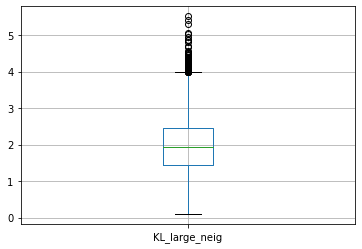

In [20]:
df_G[df_G.geo != 'None'][df_G.neig > 1].boxplot('KL_small_neig') 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


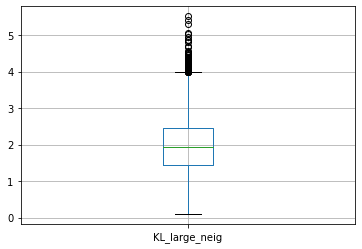

In [21]:
df_G[df_G.geo != 'None'][df_G.neig > 1].boxplot('KL_large_neig') 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


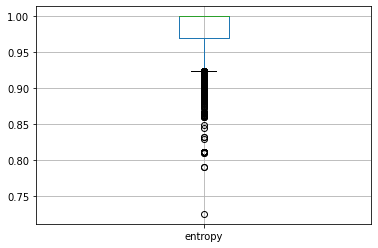

In [22]:
df_G[df_G.geo != 'None'][df_G.neig > 1].boxplot('entropy') 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


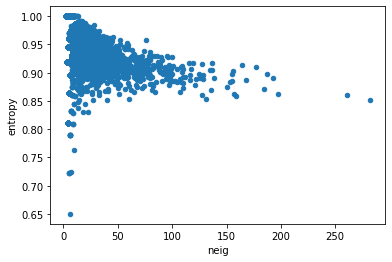

In [13]:
filt = df_G[df_G.neig > 1][df_G.neig < 500]
filt.plot.scatter(x='neig', y='entropy')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


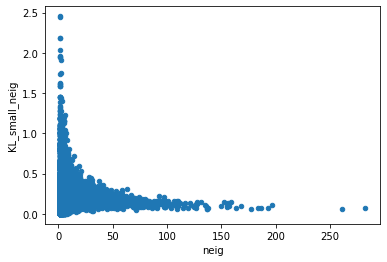

In [16]:
filt = df_G[df_G.neig > 1][df_G.neig < 500]
filt.plot.scatter(x='neig', y='KL_small_neig')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


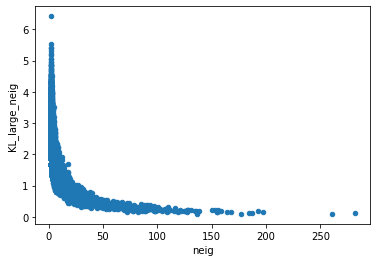

In [17]:
filt = df_G[df_G.neig > 1][df_G.neig < 500]
filt.plot.scatter(x='neig', y='KL_large_neig')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


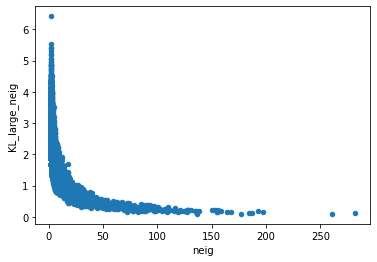

In [18]:
filt = df_G[df_G.neig > 1][df_G.neig < 500][df_G.labels_political_leaning_cat == 'l']
filt.plot.scatter(x='neig', y='KL_large_neig')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


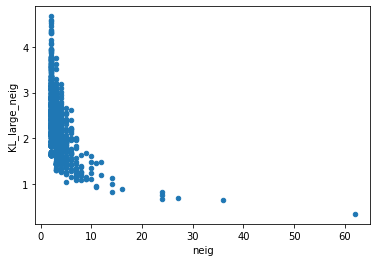

In [19]:
filt = df_G[df_G.neig > 1][df_G.neig < 500][df_G.labels_political_leaning_cat == 'r']
filt.plot.scatter(x='neig', y='KL_large_neig')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


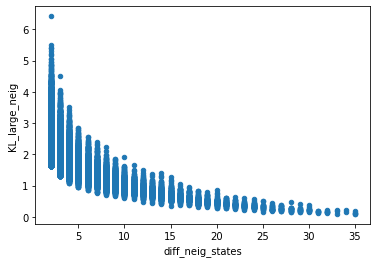

In [25]:
filt = df_G[df_G.neig > 1][df_G.neig < 500]
filt.plot.scatter(x='diff_neig_states', y='KL_large_neig')

# Same country

In [26]:
for u in G.nodes():
  u_geo = G.nodes[u]['geo']
  counter = 0
  counter_max = 0
  neig = 0
  geo_dict = {}
  if u_geo != 'None':
    for v in G.neighbors(u):
      v_geo = G.nodes[v]['geo']
      if v_geo != 'None':
        if v_geo not in geo_dict:
          geo_dict[v_geo] = 0
        geo_dict[v_geo] += 1
        neig += 1
        if v_geo == u_geo:
          counter += 1
    if len(geo_dict) > 0: 
        G.nodes[u]['max_state'] = u_geo == max(geo_dict, key=geo_dict.get)
        G.nodes[u]['found_geo'] = u_geo in geo_dict
  if len(geo_dict) > 0:
    G.nodes[u]['same_country'] = counter / neig
  else:
    G.nodes[u]['same_country'] = np.NaN
  G.nodes[u]['neig'] = neig

In [27]:
df_G = pd.DataFrame.from_dict(G.nodes, orient='index')
df_G = df_G[['geo', 'neig','same_country','max_state','found_geo']]

In [28]:
print('Number of nodes having at least one neighbour with the same geo')
print(len(df_G[df_G.found_geo == True]),'/', len(df_G[df_G.found_geo.notna()]))
print('Number of nodes having no neighbours with the same geo')
print(len(df_G[df_G.found_geo == False]),'/', len(df_G[df_G.found_geo.notna()]))

Number of nodes having at least one neighbour with the same geo
2936 / 15845
Number of nodes having no neighbours with the same geo
12909 / 15845


# Geographical bounds

In [29]:
geo_bounds = np.zeros((51,51),dtype=float)
index_dict = {}
i = 0

for u in G.nodes():
  u_geo = G.nodes[u]['geo']
  if u_geo != 'None':
    for v in G.neighbors(u):
      v_geo = G.nodes[v]['geo']
      if v_geo != 'None':
        if u_geo not in index_dict:
          index_dict[u_geo] = i 
          i += 1 
        if v_geo not in index_dict:
          index_dict[v_geo] = i 
          i += 1 

        u_index = index_dict[u_geo] 
        v_index = index_dict[v_geo] 

        geo_bounds[u_index,v_index] += 1


In [30]:
for key in index_dict.keys():
  index = index_dict[key]
  geo_bounds[:,index] = np.around(geo_bounds[:,index] /  counter_geo_edges[key],3)

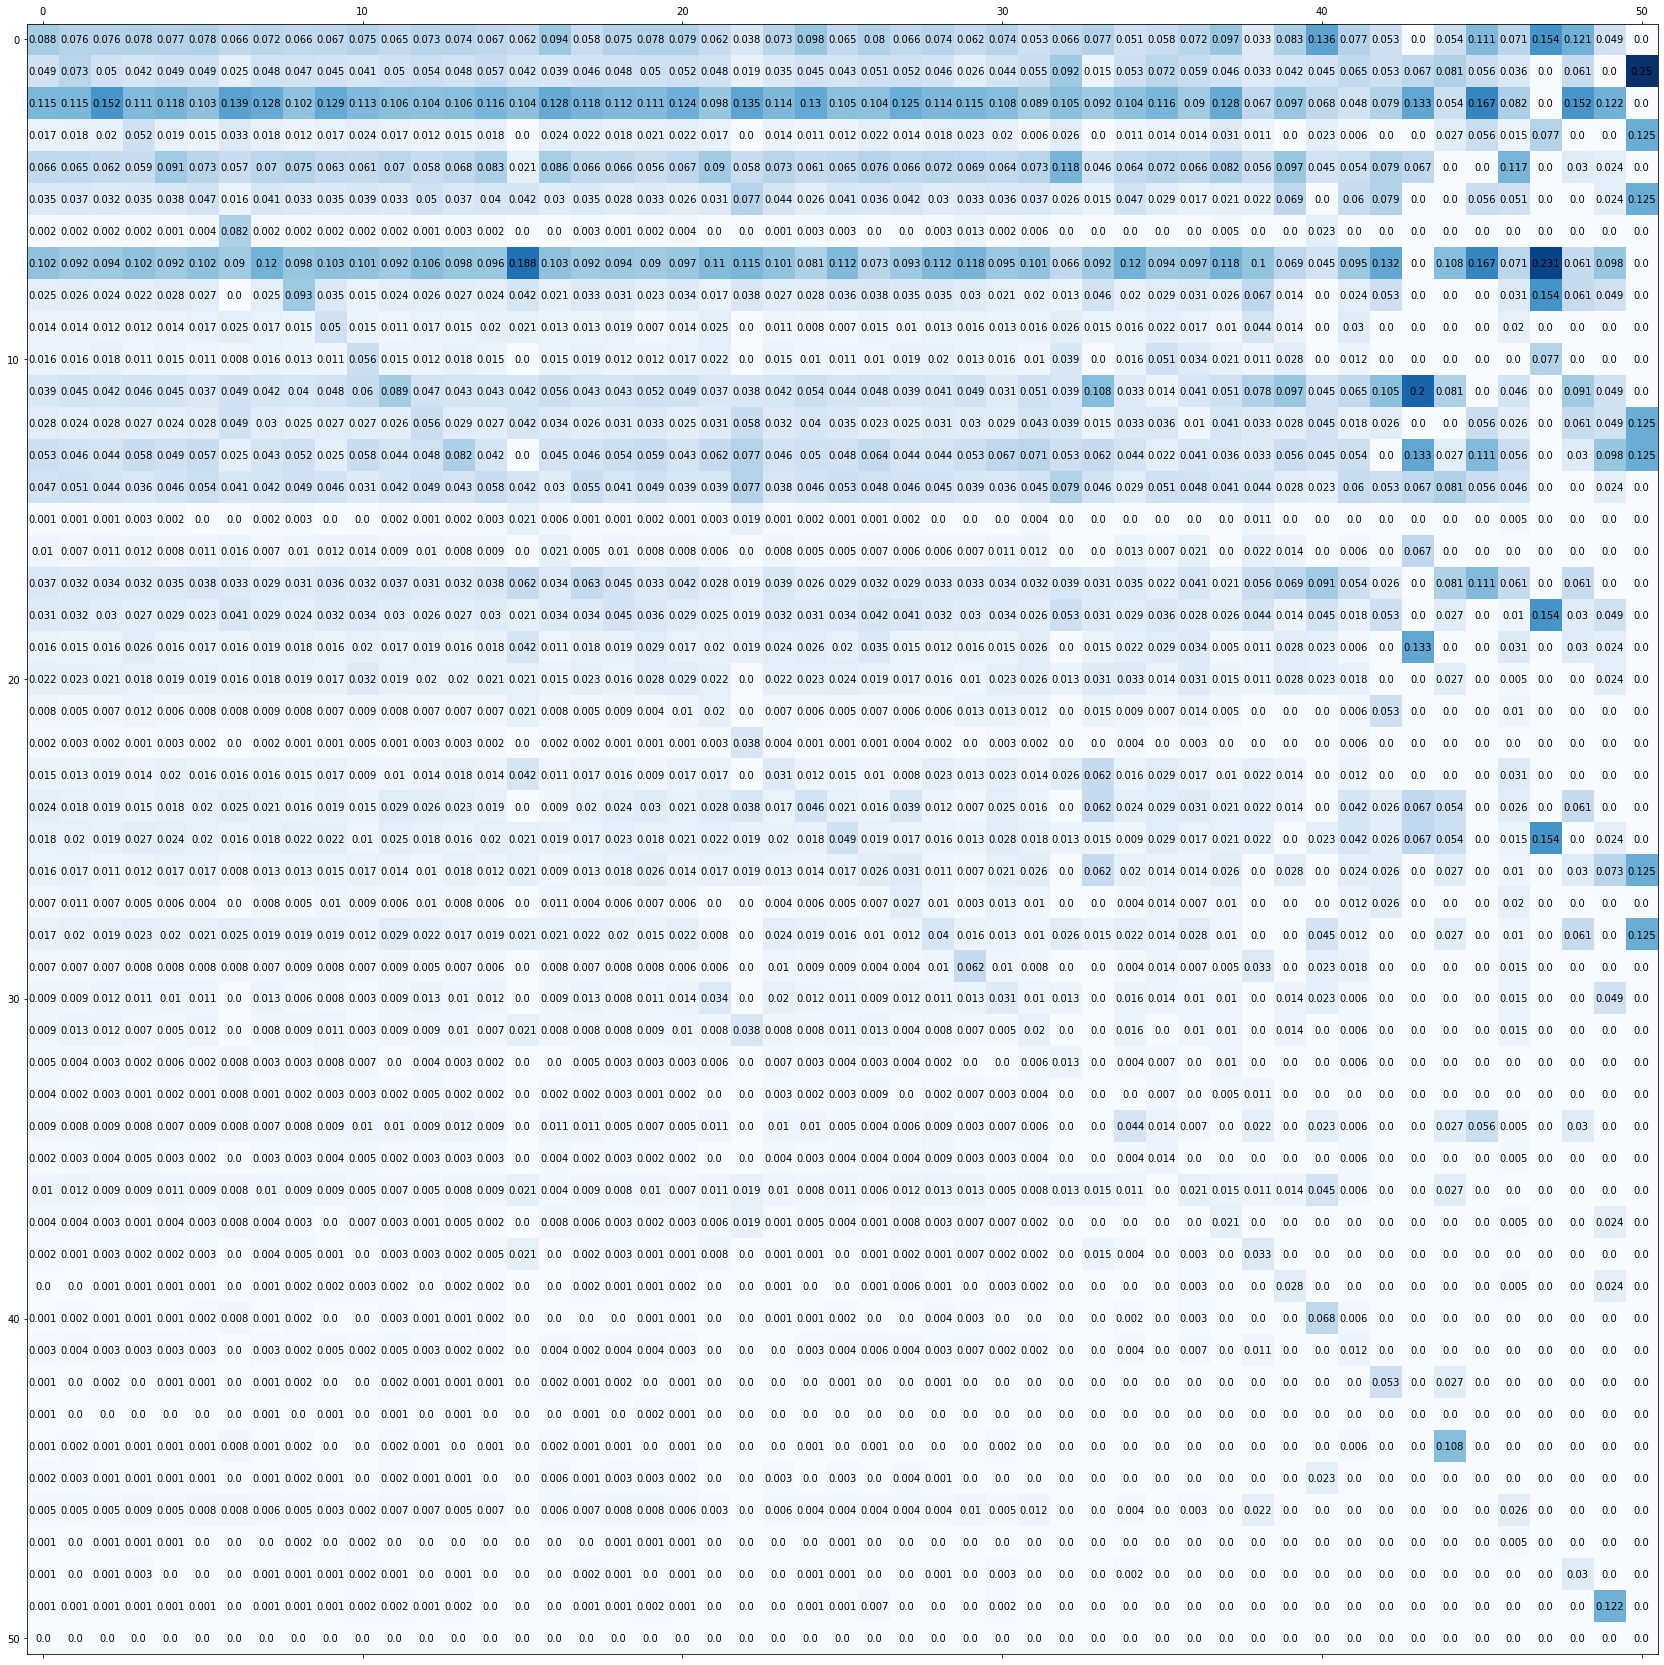

In [32]:
fig, ax = plt.subplots(figsize=(30,30))
ax.matshow(geo_bounds,cmap=plt.cm.Blues)

for i in range(len(geo_bounds)):
    for j in range(len(geo_bounds)):
        c = geo_bounds[j,i]
        ax.text(i, j, str(c), va='center', ha='center')

# Political leaning




In [33]:
global_pol = np.zeros((2,),dtype=int)
for u in G.nodes():
  if 'labels_political_leaning_cat' in G.nodes[u]:
    i = int(G.nodes[u]['labels_political_leaning_cat'] == 'r')
    global_pol[i] += 1
print(global_pol)

[83276 20690]


In [34]:
pol_cats = np.zeros((2,2),dtype=int)
for u in G.nodes():
  if 'labels_political_leaning_cat' in G.nodes[u]:
    pol_cat_u = int(G.nodes[u]['labels_political_leaning_cat'] == 'r')
    for v in G.neighbors(u):
      if 'labels_political_leaning_cat' in G.nodes[v]:
        pol_cat_v = int(G.nodes[v]['labels_political_leaning_cat'] == 'r')
        pol_cats[pol_cat_u,pol_cat_v] += 1
print(pol_cats)

[[444868  27960]
 [ 29195   3093]]


In [35]:
pol_cats / np.sum(pol_cats)

array([[0.88072443, 0.05535362],
       [0.0577986 , 0.00612335]])

# Geo Political leaning

In [ ]:
pol_cats = {}
for u in G.nodes():
    u_geo = G.nodes[u]['geo']
    if u_geo != 'None':
      if u_geo not in pol_cats:
        pol_cats[u_geo] = np.zeros((2,),dtype=int)
      for v in G.neighbors(u):
        if 'labels_political_leaning_cat' in G.nodes[v]:
          pol_cat_v = int(G.nodes[v]['labels_political_leaning_cat'] == 'r')
          pol_cats[u_geo][pol_cat_v] += 1

if True:
  for key in pol_cats.keys():
    pol_cats[key] =  pol_cats[key] / np.sum(pol_cats[key]) 

In [38]:
pol_cats

{'Alabama': array([0.94117647, 0.05882353]),
 'Alaska': array([0.94265233, 0.05734767]),
 'Arizona': array([0.94682522, 0.05317478]),
 'Arkansas': array([0.95867769, 0.04132231]),
 'Central California': array([0.96501458, 0.03498542]),
 'Colorado': array([0.93941457, 0.06058543]),
 'Connecticut': array([0.9378882, 0.0621118]),
 'District of Columbia': array([0.93795276, 0.06204724]),
 'Florida': array([0.94431294, 0.05568706]),
 'Georgia': array([0.92899408, 0.07100592]),
 'Hawaii': array([0.9375, 0.0625]),
 'Idaho': array([0.91044776, 0.08955224]),
 'Illinois': array([0.94412512, 0.05587488]),
 'Indiana': array([0.94586895, 0.05413105]),
 'Iowa': array([0.93630017, 0.06369983]),
 'Kansas': array([0.95371179, 0.04628821]),
 'Kentucky': array([0.933213, 0.066787]),
 'Louisiana': array([0.95257732, 0.04742268]),
 'Maine': array([0.96069869, 0.03930131]),
 'Maryland': array([0.9460279, 0.0539721]),
 'Massachusetts': array([0.94222108, 0.05777892]),
 'Michigan': array([0.93576923, 0.064230